## Loading images from directory as dataset

In [2]:
img_width, img_height = 100, 100
input_shape = (img_width, img_height, 1)
batch_size = 32
num_classes = 62

In [3]:
from keras.preprocessing.image import ImageDataGenerator
train_generator = ImageDataGenerator(rescale=1/255,
                                     shear_range=0.2, zoom_range=0.2)
data_generator = ImageDataGenerator(rescale=1/255)
test_generator = ImageDataGenerator(rescale=1/255)

train_ds = train_generator.flow_from_directory(
    directory="./train",
    target_size = (img_width, img_height),
    batch_size=batch_size,
    color_mode="grayscale",
    class_mode="categorical",
)

validation_ds = data_generator.flow_from_directory(
    directory="./val",
    target_size = (img_width, img_height),
    batch_size=batch_size,
    color_mode="grayscale",
    class_mode="categorical",
)

test_ds = test_generator.flow_from_directory(
    directory="./test",
    target_size=(img_width, img_height),
    batch_size=batch_size,
    color_mode="grayscale",
    class_mode="categorical",
)

Found 2356 images belonging to 62 classes.
Found 682 images belonging to 62 classes.
Found 372 images belonging to 62 classes.


## Building CNN model

### Importing required packages

In [4]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Activation
from keras.layers import Dropout, BatchNormalization

### Define the LeNet model

In [5]:
model = Sequential()

# Block 1
model.add(Conv2D(6, kernel_size=(5, 5), strides=(1, 1), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

# Block 2
model.add(Conv2D(16, kernel_size=(5, 5), strides=(1, 1), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

# Flatten the output from Block 2
model.add(Flatten())

# Block 3
model.add(Dense(120, activation='relu'))

# Block 4
model.add(Dense(84, activation='relu'))

# Output layer
model.add(Dense(num_classes, activation='softmax'))

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 96, 96, 6)         156       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 48, 48, 6)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 44, 44, 16)        2416      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 22, 22, 16)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 7744)              0         
                                                                 
 dense (Dense)               (None, 120)               9

In [7]:
from keras import optimizers

model.compile(
    optimizers.Adam(learning_rate=0.001),
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

## Train/Fit The model

In [8]:
from keras.callbacks import EarlyStopping
callback = EarlyStopping(
    monitor='val_loss',
    min_delta=0,
    patience=6,
    verbose=1,
    mode='auto',
    baseline=None,
    restore_best_weights=False
)

In [9]:
epochs_range = 100
# Train the model
history = model.fit(train_ds, batch_size=32, 
                    epochs=epochs_range,callbacks=None,
                    validation_data=validation_ds)

Epoch 1/100
74/74 [==============================] - 103s 1s/step - loss: 4.0588 - accuracy: 0.0386 - val_loss: 3.6922 - val_accuracy: 0.1261
Epoch 2/100
74/74 [==============================] - 76s 1s/step - loss: 3.0834 - accuracy: 0.2381 - val_loss: 2.8105 - val_accuracy: 0.3328
Epoch 3/100
74/74 [==============================] - 75s 1s/step - loss: 2.1367 - accuracy: 0.4410 - val_loss: 2.3698 - val_accuracy: 0.4443
Epoch 4/100
74/74 [==============================] - 75s 1s/step - loss: 1.5757 - accuracy: 0.5484 - val_loss: 2.0787 - val_accuracy: 0.5235
Epoch 5/100
74/74 [==============================] - 75s 1s/step - loss: 1.2232 - accuracy: 0.6532 - val_loss: 2.0168 - val_accuracy: 0.5630
Epoch 6/100
74/74 [==============================] - 75s 1s/step - loss: 0.9502 - accuracy: 0.7165 - val_loss: 1.9394 - val_accuracy: 0.6085
Epoch 7/100
74/74 [==============================] - 75s 1s/step - loss: 0.7784 - accuracy: 0.7627 - val_loss: 1.9934 - val_accuracy: 0.6217
Epoch 8/100


## Plot the result

In [10]:
import matplotlib.pyplot as plt

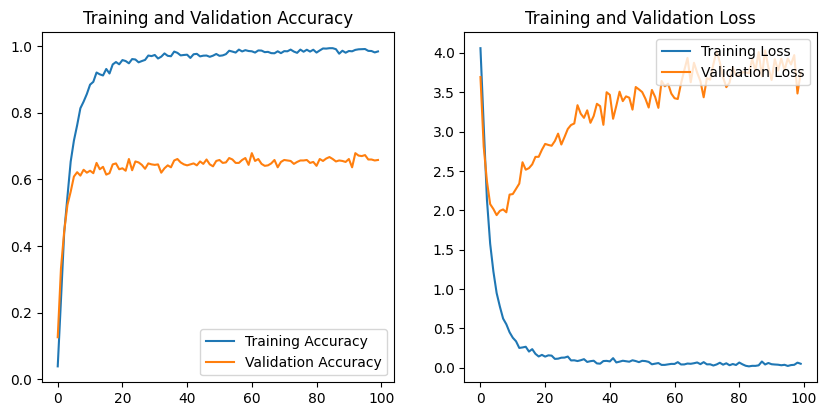

In [11]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(10, 10))
plt.subplot(2, 2, 1)
plt.plot(range(len(acc)), acc, label='Training Accuracy')
plt.plot(range(len(val_acc)), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(range(len(loss)), loss, label='Training Loss')
plt.plot(range(len(val_loss)), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## Save the model

In [12]:
# Save the model as model.h5
model.save('model_lenet.h5')
# Print the class indices 
print("Prediction Dict: ", train_ds.class_indices)

Prediction Dict:  {'0': 0, '1': 1, '10': 2, '11': 3, '12': 4, '13': 5, '14': 6, '15': 7, '16': 8, '17': 9, '18': 10, '19': 11, '2': 12, '20': 13, '21': 14, '22': 15, '23': 16, '24': 17, '25': 18, '26': 19, '27': 20, '28': 21, '29': 22, '3': 23, '30': 24, '31': 25, '32': 26, '33': 27, '34': 28, '35': 29, '36': 30, '37': 31, '38': 32, '39': 33, '4': 34, '40': 35, '41': 36, '42': 37, '43': 38, '44': 39, '45': 40, '46': 41, '47': 42, '48': 43, '49': 44, '5': 45, '50': 46, '51': 47, '52': 48, '53': 49, '54': 50, '55': 51, '56': 52, '57': 53, '58': 54, '59': 55, '6': 56, '60': 57, '61': 58, '7': 59, '8': 60, '9': 61}
